# Importing Libraries

In [2]:
import cv2 # opencv-python used for image processing
import mediapipe as mp # mediapipe used for pose estimation
import urllib.request # urllib used for downloading files
import numpy as np # numpy used for matrix operations
import pickle # pickle used for saving and loading data
import matplotlib as mpl # matplotlib used for plotting
import matplotlib.pyplot as plt # pyplot used for plotting 
from matplotlib import animation # animation used for plotting
import PyQt5 # PyQt5 used for GUI
from PIL import Image # Image used for image processing
from IPython.display import Video # Video used for video processing
import nb_helpers # nb_helpers used for helper functions
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
mp_drawing = mp.solutions.drawing_utils  # drawing utilities to overlay landmarks on image
mp_drawing_styles = mp.solutions.drawing_styles # drawing styles 
mp_holistic = mp.solutions.holistic # holistic model for pose estimation
mp_pose = mp.solutions.pose # pose model for pose estimation
mp_face_mesh = mp.solutions.face_mesh # face mesh model for face mesh estimation


In the code snippet above provided, several functions and classes from MediaPipe are used for various computer vision tasks. Let's explain each of them in detail:

1. **mp.solutions.drawing_utils** (`mp_drawing`):
   - `mp.solutions.drawing_utils` provides utility functions for drawing landmarks, annotations, and other visualizations on images or frames.

2. **mp.solutions.drawing_styles** (`mp_drawing_styles`):
   - `mp.solutions.drawing_styles` contains predefined drawing styles that you can use for rendering landmarks and annotations.

3. **mp.solutions.holistic** (`mp_holistic`):
   - `mp.solutions.holistic` is a module in MediaPipe that provides a holistic body pose estimation solution. It can simultaneously estimate facial landmarks, hand landmarks, and full-body pose, including body keypoints, face keypoints, and hand keypoints.

4. **mp.solutions.pose** (`mp_pose`):
   - `mp.solutions.pose` is a module in MediaPipe that provides a single-person body pose estimation solution. It estimates the body pose, including body keypoints such as nose, eyes, shoulders, elbows, wrists, hips, knees, and ankles.

5. **mp.solutions.face_mesh** (`mp_face_mesh`):
   - `mp.solutions.face_mesh` is a module in MediaPipe that provides facial landmark detection, allowing you to estimate the 468 unique facial landmarks on a human face. These landmarks can be used for various facial analysis tasks.

These modules and utilities are part of the MediaPipe framework, which simplifies the process of working with computer vision and multimedia tasks. Here's how they are typically used in your code example:

- `mp_drawing` is used to draw detection results, such as bounding boxes around detected faces.
- `mp_drawing_styles` provides predefined styles for drawing landmarks and annotations in a visually appealing way.
- `mp_holistic`, `mp_pose`, and `mp_face_mesh` are solutions from MediaPipe that provide specific functionalities for holistic body pose estimation, single-person body pose estimation, and facial landmark detection, respectively.

These modules and utilities save you from writing custom code for drawing and handling various aspects of computer vision tasks, making it easier to work with MediaPipe and produce visually informative results. You can explore the MediaPipe documentation and examples to learn more about how to use these components effectively for your specific use cases.

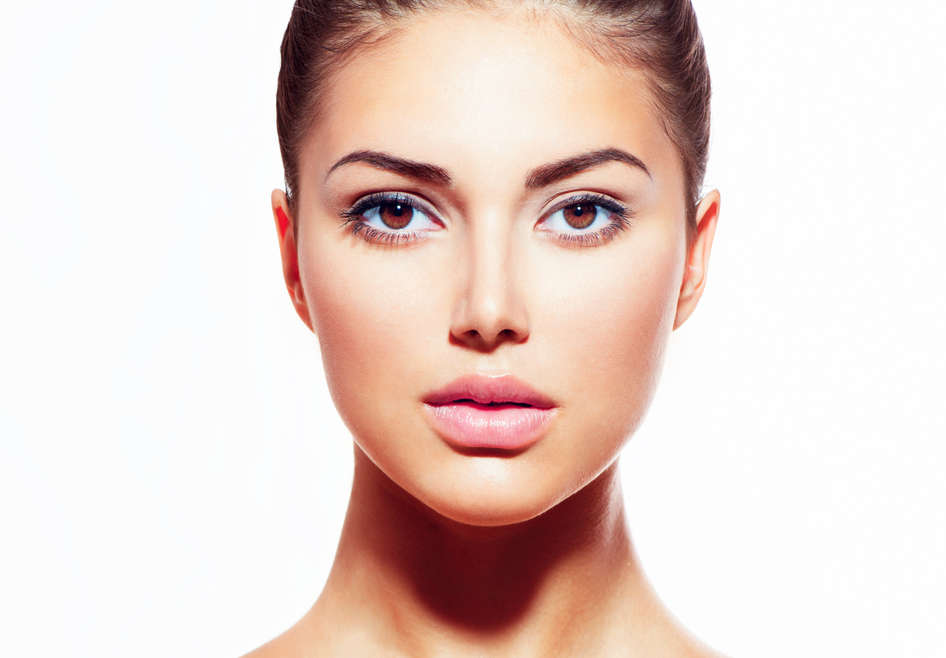

In [5]:
#face_url = "https://1vw4gb3u6ymm1ev2sp2nlcxf-wpengine.netdna-ssl.com/wp-content/uploads/shutterstock_149962697-946x658.jpg"
#urllib.request.urlretrieve(face_url, "face_image.jpg")

img = Image.open('image.png')
display(img)

We'll use MediaPipe's FaceMesh object to extract a 3D mesh corresponding to the surface of the face in the image

In [7]:
# Define image filename and drawing specifications
file = 'image.png'
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Create a face mesh object
with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

    # Read image file with cv2 and process with face_mesh
    image = cv2.imread(file)
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Define boolean corresponding to whether or not a face was detected in the image
face_found = bool(results.multi_face_landmarks)

In the provided code snippet, several functions and classes from the MediaPipe library are used to perform facial landmark detection on an image. Let's explain each of the functions and classes used:

1. **`mp_face_mesh.FaceMesh`**:
   - `mp_face_mesh.FaceMesh` is a class provided by MediaPipe for facial landmark detection. It can detect and locate facial landmarks on one or more faces within an image or video frame.

2. **`static_image_mode=True`**:
   - This parameter specifies that the FaceMesh object is configured to process a single static image. When set to `True`, the object assumes that only one image is processed, and it optimizes the processing accordingly.

3. **`max_num_faces=1`**:
   - This parameter specifies the maximum number of faces to detect. In this case, it is set to 1, indicating that the code expects to detect only one face in the image.

4. **`refine_landmarks=True`**:
   - When set to `True`, this parameter enables the refinement of landmark points for better accuracy.

5. **`min_detection_confidence=0.5`**:
   - This parameter sets the minimum confidence score required for a face detection to be considered valid. Faces with confidence scores below this threshold are not considered.

6. **`cv2.imread(file)`**:
   - This function from the OpenCV library (`cv2`) is used to read the image specified by the `file` variable.

7. **`cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`**:
   - This OpenCV function is used to convert the image from the BGR color space (commonly used in OpenCV) to the RGB color space, which is the expected color space for MediaPipe.

8. **`results = face_mesh.process(...)`**:
   - This line of code processes the image using the `face_mesh` object, which performs facial landmark detection. The results are stored in the `results` variable.

9. **`bool(results.multi_face_landmarks)`**:
   - This line checks whether any face landmarks were detected in the image. It evaluates to `True` if at least one face is detected and `False` otherwise.

The code essentially loads an image, processes it with the `FaceMesh` object, and checks if any facial landmarks are detected in the image. The `drawing_spec` variable appears to define specifications for drawing landmarks, but it's not used in this snippet.

The detected facial landmarks and their coordinates can be accessed through `results.multi_face_landmarks` if a face is detected. You can further process and analyze these landmarks as needed for your application.

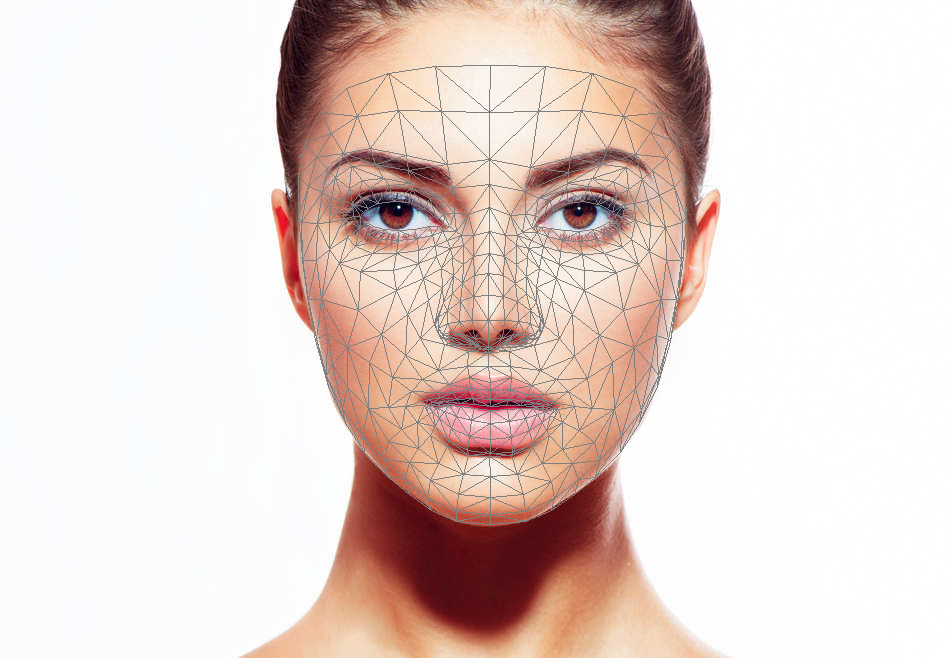

In [9]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()
    
    # Draw landmarks on face
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=results.multi_face_landmarks[0],
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        
    # Save image
    cv2.imwrite('face_tesselation_only.png', annotated_image)

# Open image
img = Image.open('face_tesselation_only.png')
display(img)

In [11]:
results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

TypeError: 'NoneType' object is not subscriptable

In [12]:
if face_found:
    # Create a copy of the image
    annotated_image = image.copy()
    
    # For each face in the image (only one in this case)
    for face_landmarks in results.multi_face_landmarks:
        
        # Draw the facial contours of the face onto the image
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_contours_style())
        
        # Draw the iris location boxes of the face onto the image
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_iris_connections_style())

	# Save the image
    cv2.imwrite('face_contours_and_irises.png', annotated_image)